In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt

Objective: Find ML model that based on the specyfication of the laptop, predicts the price
--

---
I work on the data set downloaded from: https://www.kaggle.com/datasets/muhammetvarl/laptop-price

Firstly lets get a quick insight into the data:

In [2]:
path = "./datasets/laptops/laptop_price.csv"
laptops = pd.read_csv(path, encoding='latin-1')

In [3]:
laptops.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
laptops.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [5]:
laptops.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

After the quick insight I thought how to transform this DF so it can be put into ML:

1. Numeric Attributes    
    1. Ram - '8gb' - > 8 (float)
    2. Memory - '128gb' - > 128 (float)
    3. Weights - '1.37kg' - > 1.37 (float)
    4. Cpu - for now just number of GHz 
    5. Screen Resolution -> for shure creating a feature that from 'smth         1240x720' -> goes to number of pixels   
2. Cathegorical Atributes
    1. Memory - into categories: eg SSD, HDD- more like column SSD-values, column HDD-values 0 if none   
    2. Company - definetly
    3. Product - ???
    4. Typename - definetly
    5. Screen Resolution ???
        - maybe touch screen or no -
    6. OpSys definetly 
    7. Cpu ?
        - for now just number of GHz 
    8. Gpu Maybe just AMD vs Intel vs other -
    

In [6]:
data2 = laptops.copy()

In [7]:
data2.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [8]:
#Here I will create a transformer that will handle a just downloaded data frame

from sklearn.base import BaseEstimator, TransformerMixin
import laptop_features_extractor as lfe

#names of the atributes that will be transformed into numerical attrbs
ram_ix, memory_ix, weight_ix  = "Ram","Memory", "Weight"
cpu_ix, screenResolution_ix = "Cpu", "ScreenResolution"
gpu_ix = "Gpu"

class LaptopNumericalTransformer(BaseEstimator, TransformerMixin):
    """Takes care of atributes that are meant to be numerical or one_hot_encoded"""
    
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self #nothing to do
    
    def transform(self, X):
        """X - Laptops Data frame, just after importing"""
        #Ram
        X = lfe.str_to_num_extractor(X, ram_ix)
        #Weight
        X = lfe.str_to_num_extractor(X, weight_ix)
        #Memory (adds new columns - "MemorySize", "SSD", "HDD", "Other")
        mem_col = X[memory_ix]
        df_memSize = pd.DataFrame(lfe.memory_extractor(mem_col)[0])
        df_ssd = pd.DataFrame(lfe.memory_extractor(mem_col)[1])
        df_hdd = pd.DataFrame(lfe.memory_extractor(mem_col)[2])
        df_other = pd.DataFrame(lfe.memory_extractor(mem_col)[3])
        X = pd.concat([X, df_memSize, df_ssd, df_hdd, df_other], axis=1)
        #Cpu (the 'Cpu' column transforms into 'cpu_Ghz'!!)
        cpu_col = X[cpu_ix]
        df_cpu = pd.DataFrame(lfe.cpu_extractor(cpu_col))
        X = pd.concat([X, df_cpu], axis=1)
        X = X.drop(cpu_ix, axis=1)
        #ScreenResolution ('ScreenResolution' -> 'nr_pixels' columns)
        pix_col = X[screenResolution_ix]
        df_pix = pd.DataFrame(lfe.screenResolution_extractor(pix_col))
        X = pd.concat([X,df_pix], axis=1)
        #ScreenResolution -> adds 'touchscreen' column - 1 or 0
        df_touchscreen = pd.DataFrame(lfe.ScreenResolution_touchscreen_extractor(pix_col))
        X = pd.concat([X,df_touchscreen], axis=1)
        #drop the touchscreen enough for now from this column
        X = X.drop(screenResolution_ix, axis=1)
        #GPU - adds columns ['Intel', 'AMD', 'Nvidia'] and removes Gpu
        gpu_col = X[gpu_ix]
        df_gpu = pd.DataFrame(lfe.Gpu_company_extractor(gpu_col))
        #drop the other gpu companies column
        df_gpu = df_gpu.drop(df_gpu.columns[-1], axis=1)
        X = X.drop(gpu_ix, axis=1)
        X = pd.concat([X,df_gpu], axis=1)
        #no drop of screen resolution - it is also used for 
        # one hot encoder!
        return X

In [9]:
#transform the data so I can work on them
trans_lapt = LaptopNumericalTransformer()
laptops_clean = trans_lapt.transform(data2)
data2 = laptops.copy()

In [10]:
#cathegorical atributes from the transformed data frame
company_ix, typename_ix, opSys_ix = "Company", "TypeName", "OpSys"
memory_ix, screenResolution_ix = "Memory", "ScreenResolution"
gpu_ix = "Gpu"

#numerical attributes from the transformed laptops data frame
inches_ix, ram_ix, weight_ix = "Inches", "Ram", "Weight"
memory_size_ix, cpu_GHz_ix = "MemorySize", "cpu_GHz" 
nr_pixels_ix = "nr_pixels"
price_ix = "Price_euros"

#my one-hot-encoded-data
nvidia_ix, intel_ix, amd_ix = "Nvidia", "Intel", "AMD"
ssd_ix, hdd_ix, mem_other_ix = "SSD", "HDD", "Other"
touchscreen_ix = "touchscreen"

def giveLaptops_num_cat(laptop_clean_df):
    """
    Use only after calling @LaptopNumericalTransformer.transform
    on the raw data from kagle (So that the numerical data are present)
    Returns:
    laptop_num, laptop_cat, laptop_one_hot
    where:
    laptop_num (pd.DataFrame):  containing numerical Attributes and the label!
    laptop_cat (pd.DataFrame): containing cathegorical Attributes
    laptop_one_hot (pd.DataFrame): containing my one_hot_encoded atributes (eg 'SSD')
    """
    cat_cols = [company_ix, typename_ix, opSys_ix]
    num_cols = [inches_ix, ram_ix, weight_ix, 
                memory_size_ix, cpu_GHz_ix,
               nr_pixels_ix, price_ix]
    one_hot_cols = [hdd_ix, ssd_ix, mem_other_ix, 
                    intel_ix, nvidia_ix, amd_ix,touchscreen_ix]
    
    laptop_cat = laptop_clean_df[cat_cols].copy()
    laptop_num = laptop_clean_df[num_cols].copy()
    laptop_one_hot = laptop_clean_df[one_hot_cols].copy()
    return laptop_num, laptop_cat, laptop_one_hot

In [11]:
print("Thats the data frame on which you can work now!")
laptops_clean.head()

Thats the data frame on which you can work now!


,laptop_ID,Company,Product,TypeName,Inches,Ram,Memory,OpSys,Weight,Price_euros,MemorySize,SSD,HDD,Other,cpu_GHz,nr_pixels,touchscreen,Intel,AMD,Nvidia
0,1,Apple,MacBook Pro,Ultrabook,13.3,8.0,128GB SSD,macOS,1.37,1339.69,128.0,1.0,0.0,0.0,2.3,4096000.0,0,1.0,0.0,0.0
1,2,Apple,Macbook Air,Ultrabook,13.3,8.0,128GB Flash Storage,macOS,1.34,898.94,128.0,0.0,0.0,1.0,1.8,1296000.0,0,1.0,0.0,0.0
2,3,HP,250 G6,Notebook,15.6,8.0,256GB SSD,No OS,1.86,575.00,256.0,1.0,0.0,0.0,2.5,2073600.0,0,1.0,0.0,0.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,16.0,512GB SSD,macOS,1.83,2537.45,512.0,1.0,0.0,0.0,2.7,5184000.0,0,0.0,1.0,0.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,8.0,256GB SSD,macOS,1.37,1803.60,256.0,1.0,0.0,0.0,3.1,4096000.0,0,1.0,0.0,0.0


---

Another quick review of the numerical attributes
--

In [12]:
#split transformed data frame into 3 df's each containing different type of attributes
laptop_num, laptop_cat, laptop_one_hot = giveLaptops_num_cat(laptops_clean)

In [13]:
laptop_num.head()

,Inches,Ram,Weight,MemorySize,cpu_GHz,nr_pixels,Price_euros
0,13.3,8.0,1.37,128.0,2.3,4096000.0,1339.69
1,13.3,8.0,1.34,128.0,1.8,1296000.0,898.94
2,15.6,8.0,1.86,256.0,2.5,2073600.0,575.00
3,15.4,16.0,1.83,512.0,2.7,5184000.0,2537.45
4,13.3,8.0,1.37,256.0,3.1,4096000.0,1803.60


array([[<Axes: title={'center': 'Inches'}>,
        <Axes: title={'center': 'Ram'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'MemorySize'}>,
        <Axes: title={'center': 'cpu_GHz'}>,
        <Axes: title={'center': 'nr_pixels'}>],
       [<Axes: title={'center': 'Price_euros'}>, <Axes: >, <Axes: >]],
      dtype=object)

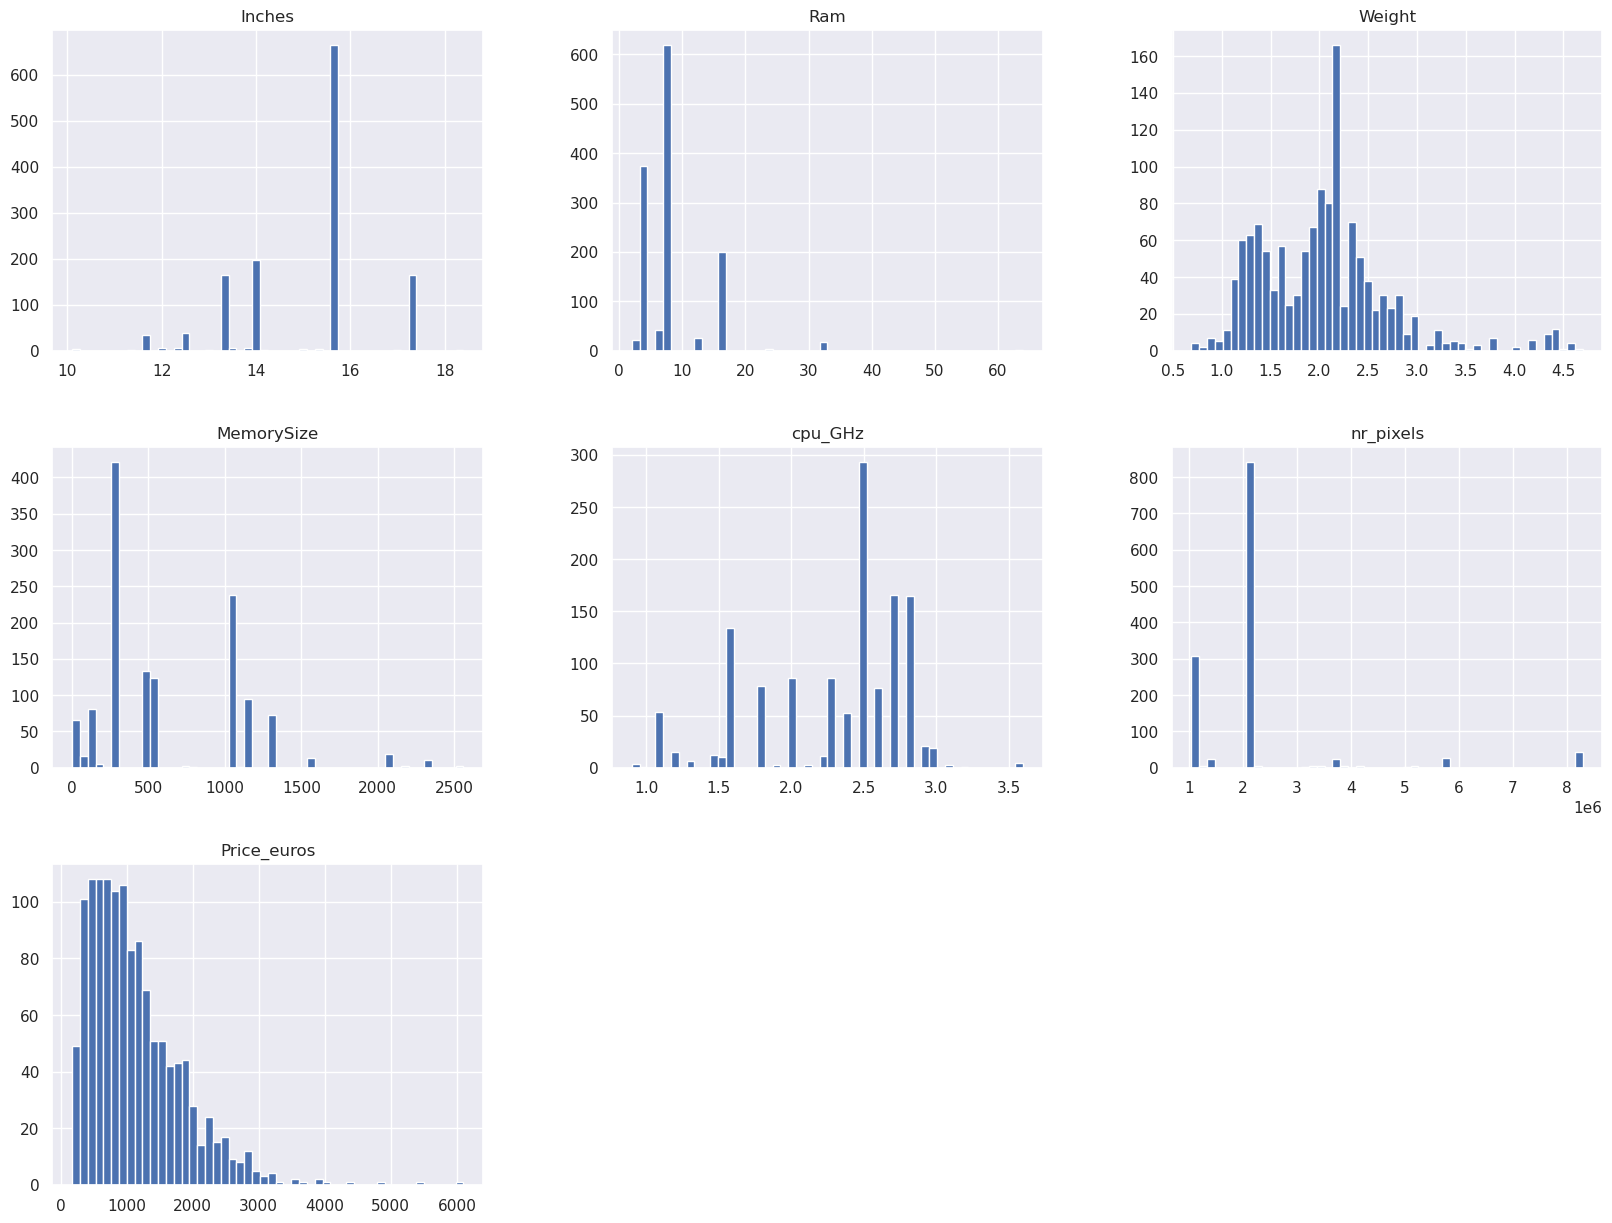

In [14]:
#get a look at the numerical attributes
laptop_num.hist(bins=50, figsize=(20,15))

---

Creating a stratified test set based on the price attribute.
--


min 174.0
max 6099.0


Text(0.5, 1.0, 'Price distribution in overall set')

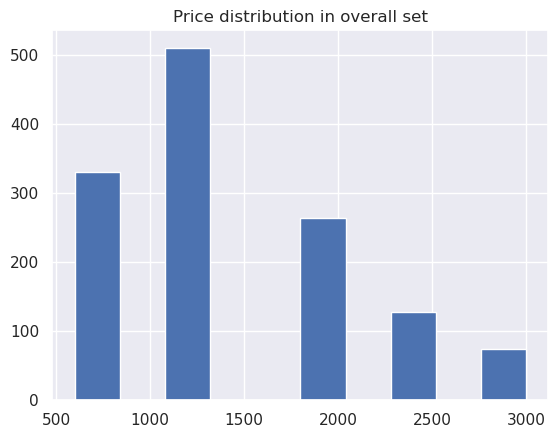

In [15]:
print("min",laptops_clean["Price_euros"].min())
print("max",laptops_clean["Price_euros"].max())
laptops_clean["price_cat"] = pd.cut(laptops_clean["Price_euros"], 
                                    bins=[0.,600.,1200.,1800.,2400.,np.inf],
                                    labels=[600,1200,1800,2400,3000])

laptops_clean["price_cat"].hist()
plt.title("Price distribution in overall set")

In [16]:
#ready to do stratified sampling based on the price category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(laptops_clean, laptops_clean["price_cat"]):
    strat_train_set = laptops_clean.loc[train_index]
    strat_test_set = laptops_clean.loc[test_index]

Text(0.5, 1.0, 'price distribution in train set')

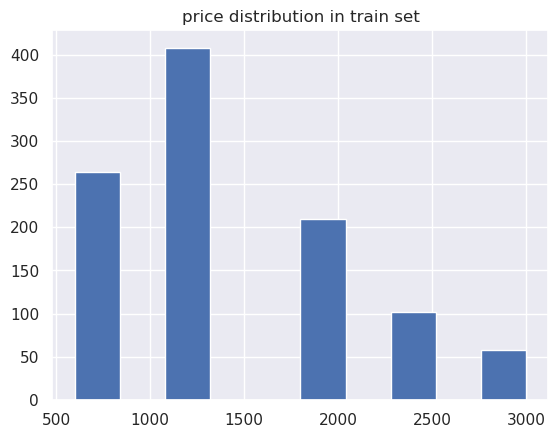

In [17]:
strat_train_set["price_cat"].hist()
plt.title("price distribution in train set")

Now that I am confident laptop prices are statistically well represented in my training set, I will proceed with data preparation.

Get insights to the data
--

In [18]:
#removing income_cat- not need that any more!
for set_ in (strat_train_set, strat_test_set):
    set_.drop("price_cat", axis=1, inplace=True)

#From now laptops means the train set !!!
laptops = strat_train_set.copy()

#spliting the data set into num and cat atributes
laptop_num, laptop_cat, laptop_one_hot = giveLaptops_num_cat(laptops)

In [19]:
laptop_num.head()

,Inches,Ram,Weight,MemorySize,cpu_GHz,nr_pixels,Price_euros
442,12.5,8.0,1.36,256.0,2.5,2073600.0,1429.00
427,14.0,8.0,1.60,256.0,2.8,2073600.0,1099.00
1067,13.3,8.0,1.62,256.0,2.5,2073600.0,798.01
577,17.3,32.0,4.60,1280.0,2.7,2073600.0,2663.00
95,13.3,8.0,1.50,256.0,1.6,2073600.0,847.00


In [20]:
corr_matrix = laptop_num.corr()

#let look how the correlations look like
corr_matrix[price_ix].sort_values(ascending=False)

Price_euros    1.000000
Ram            0.734175
nr_pixels      0.496259
cpu_GHz        0.431977
Weight         0.203431
MemorySize     0.165671
Inches         0.070097
Name: Price_euros, dtype: float64

array([[<Axes: xlabel='Inches', ylabel='Inches'>,
        <Axes: xlabel='Ram', ylabel='Inches'>,
        <Axes: xlabel='Weight', ylabel='Inches'>,
        <Axes: xlabel='MemorySize', ylabel='Inches'>,
        <Axes: xlabel='cpu_GHz', ylabel='Inches'>,
        <Axes: xlabel='nr_pixels', ylabel='Inches'>,
        <Axes: xlabel='Price_euros', ylabel='Inches'>],
       [<Axes: xlabel='Inches', ylabel='Ram'>,
        <Axes: xlabel='Ram', ylabel='Ram'>,
        <Axes: xlabel='Weight', ylabel='Ram'>,
        <Axes: xlabel='MemorySize', ylabel='Ram'>,
        <Axes: xlabel='cpu_GHz', ylabel='Ram'>,
        <Axes: xlabel='nr_pixels', ylabel='Ram'>,
        <Axes: xlabel='Price_euros', ylabel='Ram'>],
       [<Axes: xlabel='Inches', ylabel='Weight'>,
        <Axes: xlabel='Ram', ylabel='Weight'>,
        <Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='MemorySize', ylabel='Weight'>,
        <Axes: xlabel='cpu_GHz', ylabel='Weight'>,
        <Axes: xlabel='nr_pixels', ylabel='Weig

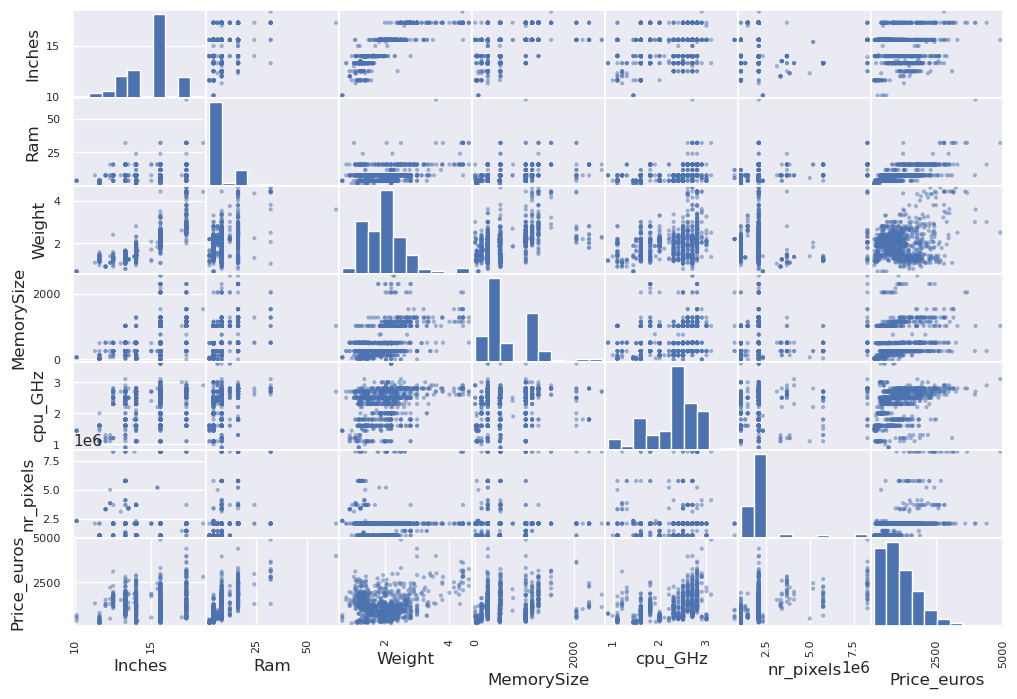

In [21]:
from pandas.plotting import scatter_matrix

scatter_matrix(laptop_num, figsize=(12,8)) 

Ram seems to be the most promising attribute!

<Axes: xlabel='Ram', ylabel='Price_euros'>

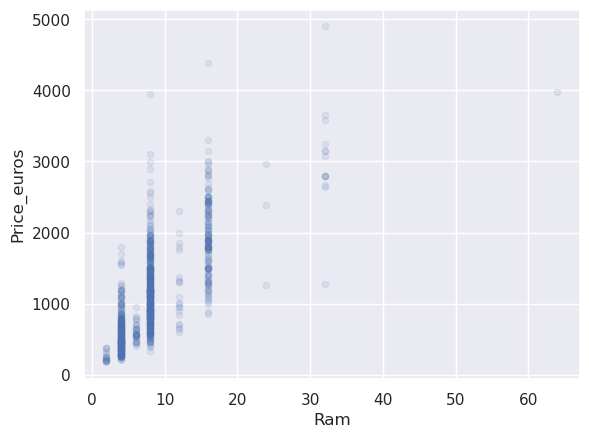

In [22]:
laptop_num.plot(kind="scatter", x=ram_ix, y=price_ix, alpha=0.1)

Initial observations suggest that I should treat the numerical values more categorically. However, I will first check how the model performs.

In [23]:
#deleting price outliers
arr = laptop_num[price_ix]<3000

laptop_num = laptop_num[arr]
laptop_cat = laptop_cat[arr]
laptop_one_hot = laptop_one_hot[arr]

---
Now let's experiment with attribute combinations a little bit.

I will use my function to create all possible combinations of attributes and then examine the correlations in the data.

In [24]:
from my_ml_lib import num_attrs_combinations
#create new combinations of the data
new_attr_combinations = num_attrs_combinations(laptop_num)
new_attr_combinations.head()

,Inches_per_Ram,Inches_per_Weight,Inches_per_MemorySize,Inches_per_cpu_GHz,Inches_per_nr_pixels,Ram_per_Weight,Ram_per_MemorySize,Ram_per_cpu_GHz,Ram_per_nr_pixels,Weight_per_MemorySize,Weight_per_cpu_GHz,Weight_per_nr_pixels,MemorySize_per_cpu_GHz,MemorySize_per_nr_pixels,cpu_GHz_per_nr_pixels
442,1.562500,9.191176,0.048828,5.000000,0.000006,5.882353,0.03125,3.200000,0.000004,0.005313,0.544000,6.558642e-07,102.400000,0.000123,1.205633e-06
427,1.750000,8.750000,0.054688,5.000000,0.000007,5.000000,0.03125,2.857143,0.000004,0.006250,0.571429,7.716049e-07,91.428571,0.000123,1.350309e-06
1067,1.662500,8.209877,0.051953,5.320000,0.000006,4.938272,0.03125,3.200000,0.000004,0.006328,0.648000,7.812500e-07,102.400000,0.000123,1.205633e-06
577,0.540625,3.760870,0.013516,6.407407,0.000008,6.956522,0.02500,11.851852,0.000015,0.003594,1.703704,2.218364e-06,474.074074,0.000617,1.302083e-06
95,1.662500,8.866667,0.051953,8.312500,0.000006,5.333333,0.03125,5.000000,0.000004,0.005859,0.937500,7.233796e-07,160.000000,0.000123,7.716049e-07


In [25]:
laptop_num.head()

,Inches,Ram,Weight,MemorySize,cpu_GHz,nr_pixels,Price_euros
442,12.5,8.0,1.36,256.0,2.5,2073600.0,1429.00
427,14.0,8.0,1.60,256.0,2.8,2073600.0,1099.00
1067,13.3,8.0,1.62,256.0,2.5,2073600.0,798.01
577,17.3,32.0,4.60,1280.0,2.7,2073600.0,2663.00
95,13.3,8.0,1.50,256.0,1.6,2073600.0,847.00


There are many new attributes, so later I will select only those that have a correlation higher than ±0.5 with the price.


-----------
Prepare the Data for ML Alghoritms
--

In [26]:
from my_ml_lib import potential_attrs


def combine_orginal_with_new(orginal_laptop_num_DF,cat_laptop_df,
                             one_hot_laptop_DF, combination_laptop_DF,
                             label_name, corr_tresh=0.5):
    """
    ---
    Params:
    This function combines:
    orginal_laptop_num (Pandas.DataFrame): data that contains numerical attributes
        from the @giveLaptops_num_cat function
        !!!this one has to contain the label!!!
    cat_laptop_df (Pandas.DataFrame) : data that contains categorical attributes
        from the @giveLaptops_num_cat function
    one_hot_laptop_DF (Pandas.DataFrame): data that contains my one-hot encoded
        attributes derrived from the @giveLaptops_num_cat
    combination_laptop_DF (Pandas.DataFrame): data obtained from
        @my_ml_lib.num_attrs_combinations that contains combinations of orginal_laptop_num
        features
    label_name (string): label name for the entire laptop data set
    corr_tresh(float): a correlation treshold for the new
        created features (combination_laptop_DF) that makes a new feature accepted
    ---
    Returns:
    laptop_num_final (Pandas.DataFrame):data that was stored in the orginal data drame,
        new combination of attributes that met the corr_tresh with the label, and new
        one-hot encoded data
    cols_for_num_transform (list): list of columns that will be passed into
        transformers that handle numerical data
    cols_for_cat_transform (list): list of columns that will be passed into
        transformers that handle cathegorical data
    cols_pass_trough (list): list of columns that will be ignored by transformers
    """
    
    
    # Check if all DataFrames have the same number of rows
    if not (orginal_laptop_num_DF.shape[0] == cat_laptop_df.shape[0] == 
            one_hot_laptop_DF.shape[0] == combination_laptop_DF.shape[0]):
        raise ValueError("All input DataFrames must have the same number of rows.")

   
    #check if label name is present
    if label_name not in orginal_laptop_num_DF.columns:
        ValueError("orginal_laptop_num_DF does not contain the '", label_name,"' column'!")
   
    #if label present somwhere else delete it so you dont feed ml with a label
    if label_name in (cat_laptop_df.columns):
        cat_laptop_df = cat_laptop_df.drop(label_name, axis=1)
    if label_name in (one_hot_laptop_DF.columns):
        cat_laptop_df = one_hot_laptop_DF.drop(label_name, axis=1)
    if label_name in (combination_laptop_DF.columns):
        cat_laptop_df = combination_laptop_DF.drop(label_name, axis=1)

   
    cols_for_num_transform = []
    cols_for_cat_transform = []
    cols_pass_trough = []
   
    #concat dfs so corelation matrix can be crreated
    comb_df = pd.concat([combination_laptop_DF, orginal_laptop_num_DF[label_name]],axis=1)
   
    #find which attributes correlate strongly with price
    strong_corr_cols = potential_attrs(DataFr=comb_df, corr_tresh=corr_tresh, label_name=label_name)[0]
   
    #add columns that should be later treated by num transformers
    cols_for_num_transform = list(strong_corr_cols)
    cols_for_num_transform.append(list(orginal_laptop_num_DF.columns))
    #add columns to be treated by cathegorical tansformers
    cols_for_cat_transform.append(list(combination_laptop_DF.columns))
    #add columns to be ignored
    cols_pass_trough = list(one_hot_laptop_DF.columns)
   
    #combine the data
    laptop_num_final = pd.concat([comb_df[strong_corr_cols],one_hot_laptop_DF ,cat_laptop_df,orginal_laptop_num_DF],axis=1)
   
    laptop_num_final = laptop_num_final.drop([label_name], axis=1)
   
   
   
    return laptop_num_final, cols_for_num_transform, cols_for_cat_transform, cols_pass_trough


Prepare the final dataset that will be fed into transformers as well as the column names.

In [27]:
#extract all info so that ml model can be finally trained
cown = combine_orginal_with_new(orginal_laptop_num_DF=laptop_num,
                                    cat_laptop_df=laptop_cat,
                                    one_hot_laptop_DF=laptop_one_hot, 
                                    combination_laptop_DF= new_attr_combinations,
                                    label_name=price_ix, corr_tresh=0.5)

In [28]:
laptop_num_final, cols_for_num_transform, cols_for_cat_transform, cols_pass_trough = cown

In [29]:
print("Final DF ready to feed into ML alghoritms:")
laptop_num_final.head()

Final DF ready to feed into ML alghoritms:


,Inches_per_Ram,Inches_per_nr_pixels,Ram_per_Weight,Ram_per_cpu_GHz,HDD,SSD,Other,Intel,Nvidia,AMD,touchscreen,Company,TypeName,OpSys,Inches,Ram,Weight,MemorySize,cpu_GHz,nr_pixels
442,1.562500,0.000006,5.882353,3.200000,0.0,1.0,0.0,1.0,0.0,0.0,0,Lenovo,Ultrabook,Windows 10,12.5,8.0,1.36,256.0,2.5,2073600.0
427,1.750000,0.000007,5.000000,2.857143,0.0,1.0,0.0,1.0,0.0,0.0,0,Dell,Ultrabook,Linux,14.0,8.0,1.60,256.0,2.8,2073600.0
1067,1.662500,0.000006,4.938272,3.200000,0.0,1.0,0.0,1.0,0.0,0.0,1,Dell,2 in 1 Convertible,Windows 10,13.3,8.0,1.62,256.0,2.5,2073600.0
577,0.540625,0.000008,6.956522,11.851852,1.0,1.0,0.0,0.0,1.0,0.0,0,Lenovo,Gaming,Windows 10,17.3,32.0,4.60,1280.0,2.7,2073600.0
95,1.662500,0.000006,5.333333,5.000000,0.0,1.0,0.0,1.0,0.0,0.0,1,Acer,2 in 1 Convertible,Windows 10,13.3,8.0,1.50,256.0,1.6,2073600.0


A pipeline has to be created:
--

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())])

#laptops_num_tr = num_pipeline.fit_transform(laptop_num_final)

---    
CATEGORICAL ATTRIBUTES:   
Now, let's examine the categorical attributes.

In [31]:
laptop_cat.head()

,Company,TypeName,OpSys
442,Lenovo,Ultrabook,Windows 10
427,Dell,Ultrabook,Linux
1067,Dell,2 in 1 Convertible,Windows 10
577,Lenovo,Gaming,Windows 10
95,Acer,2 in 1 Convertible,Windows 10


Now just take care of this DataFrame upstairs and you are ready to go with ML training!